In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
(X_train, y_train) , (X_test, y_test) = datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
X_test.shape

(10000, 28, 28)

In [5]:
X_train[0].shape

(28, 28)

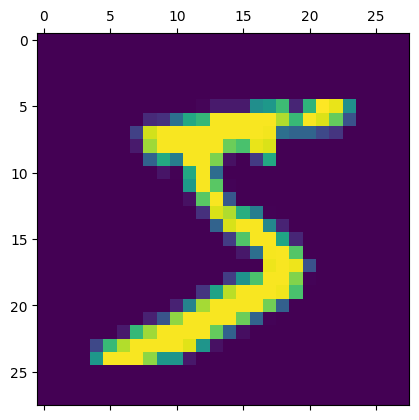

In [6]:
plt.matshow(X_train[0])

In [7]:
y_train[0]

5

In [8]:
X_train = X_train / 255
X_test = X_test / 255

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 10s 4ms/step - loss: 0.2780 - accuracy: 0.9214
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1256 - accuracy: 0.9631
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0882 - accuracy: 0.9737
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0674 - accuracy: 0.9791
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0531 - accuracy: 0.9839
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0440 - accuracy: 0.9862
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0354 - accuracy: 0.9892
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0292 - accuracy: 0.9910
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0243 - accuracy: 0.9923
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.02

In [10]:
model.evaluate(X_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0805 - accuracy: 0.9779


[0.08052020519971848, 0.9779000282287598]

In [12]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

Test Accuracy: 0.9779000282287598


In [13]:
y_pred = model.predict(X_test)
y_pred = [np.argmax(i) for i in y_pred]
print(y_test.shape)
print(y_pred[0])

313/313 [==============================] - 1s 1ms/step
(10000,)
7


In [14]:
cm = tf.math.confusion_matrix(y_test,y_pred)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 970,    1,    1,    0,    0,    1,    5,    1,    1,    0],
       [   0, 1123,    2,    2,    0,    0,    2,    1,    5,    0],
       [   6,    2,  999,    4,    1,    0,    2,    6,   11,    1],
       [   0,    0,    4,  994,    0,    3,    1,    4,    2,    2],
       [   1,    0,    3,    0,  958,    1,    4,    5,    1,    9],
       [   1,    0,    0,   10,    2,  868,    3,    0,    6,    2],
       [   3,    3,    5,    1,    2,    4,  939,    0,    1,    0],
       [   3,    2,   12,    2,    1,    0,    0,  999,    5,    4],
       [   1,    0,    4,    4,    2,    3,    2,    5,  950,    3],
       [   3,    3,    0,    2,    9,    1,    1,    5,    6,  979]],
      dtype=int32)>

Text(95.72222222222221, 0.5, 'Actual Values')

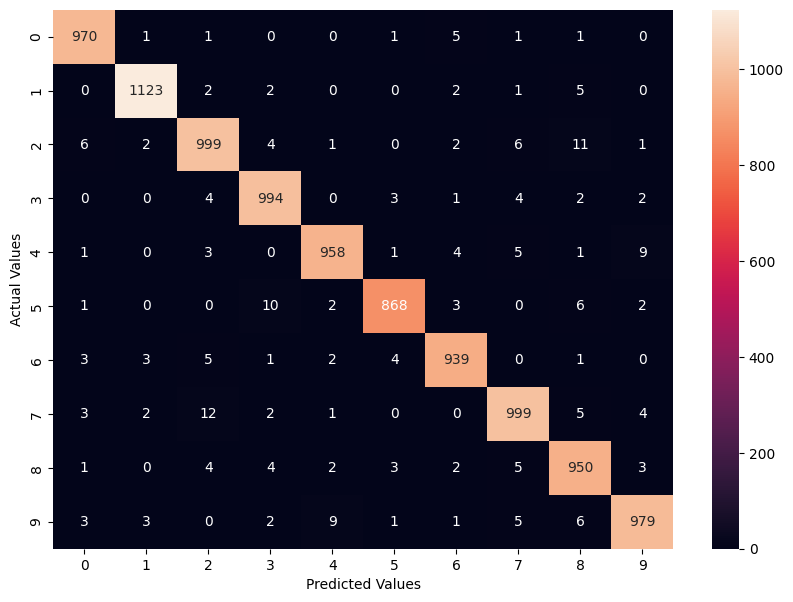

In [15]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm,annot = True,fmt = 'd')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')

In [16]:
# Save the trained model
model.save("mnist_cnn_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [21]:
# Testing new image on the trained model

import cv2

# Load the trained model
model = tf.keras.models.load_model("/content/mnist_cnn_model.h5")

# Function to preprocess the test image
def preprocess_image(image_path):
    # Load the image using OpenCV
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Resize the image to 28x28 (same size as MNIST digits)
    image = cv2.resize(image, (28, 28))

    # Normalize the pixel values to be between 0 and 1
    image = image / 255.0

    # Add a batch dimension to the image
    image = image.reshape(1, 28, 28, 1)

    return image

In [18]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Actual image


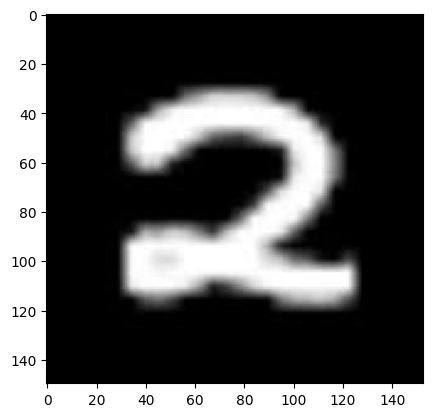

1/1 [==============================] - 0s 31ms/step
Predicted Label: 2


In [26]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_image_path = "/content/drive/MyDrive/DIGIT_RECOGNITION/two.jpg"

# Load and display the image
img = mpimg.imread(test_image_path)
print("Actual image")
plt.imshow(img)
plt.show()
# Preprocess the test image
preprocessed_image = preprocess_image(test_image_path)

# Make predictions on the test image
predictions = model.predict(preprocessed_image)

# Get the predicted label (digit) from the model's output
predicted_label = tf.argmax(predictions, axis=1)[0].numpy()

print("Predicted Label:", predicted_label)

Actual image


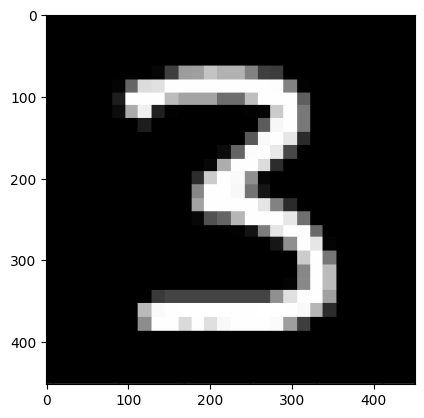

1/1 [==============================] - 0s 17ms/step
Predicted Label: 3


In [28]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_image_path = "/content/drive/MyDrive/DIGIT_RECOGNITION/three.png"

# Load and display the image
img = mpimg.imread(test_image_path)
print("Actual image")
plt.imshow(img)
plt.show()
# Preprocess the test image
preprocessed_image = preprocess_image(test_image_path)

# Make predictions on the test image
predictions = model.predict(preprocessed_image)

# Get the predicted label (digit) from the model's output
predicted_label = tf.argmax(predictions, axis=1)[0].numpy()

print("Predicted Label:", predicted_label)

Actual image


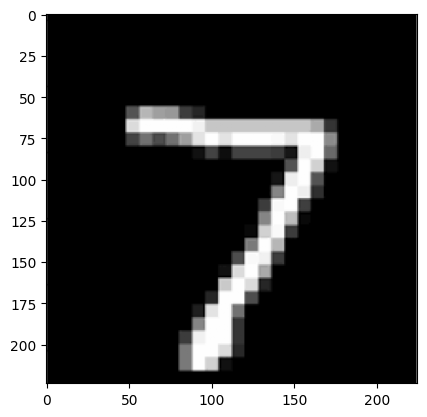

1/1 [==============================] - 0s 17ms/step
Predicted Label: 7


In [30]:

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_image_path = "/content/drive/MyDrive/DIGIT_RECOGNITION/seven.png"

# Load and display the image
img = mpimg.imread(test_image_path)
print("Actual image")
plt.imshow(img)
plt.show()
# Preprocess the test image
preprocessed_image = preprocess_image(test_image_path)

# Make predictions on the test image
predictions = model.predict(preprocessed_image)

# Get the predicted label (digit) from the model's output
predicted_label = tf.argmax(predictions, axis=1)[0].numpy()

print("Predicted Label:", predicted_label)